In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style("white")
sns.set_context("talk", font_scale=1.2)

In [3]:
loc = 50
scale = 15

In [4]:
parent_heights = sp.random.normal(loc=loc, scale=scale, size=5000)
selected_parents = [x for x in parent_heights if x > 55]
len(selected_parents)

1872

In [5]:
def plot_hist(d, title):
    plt.hist(d)
    plt.title(title)
    sns.despine()
    plt.show()

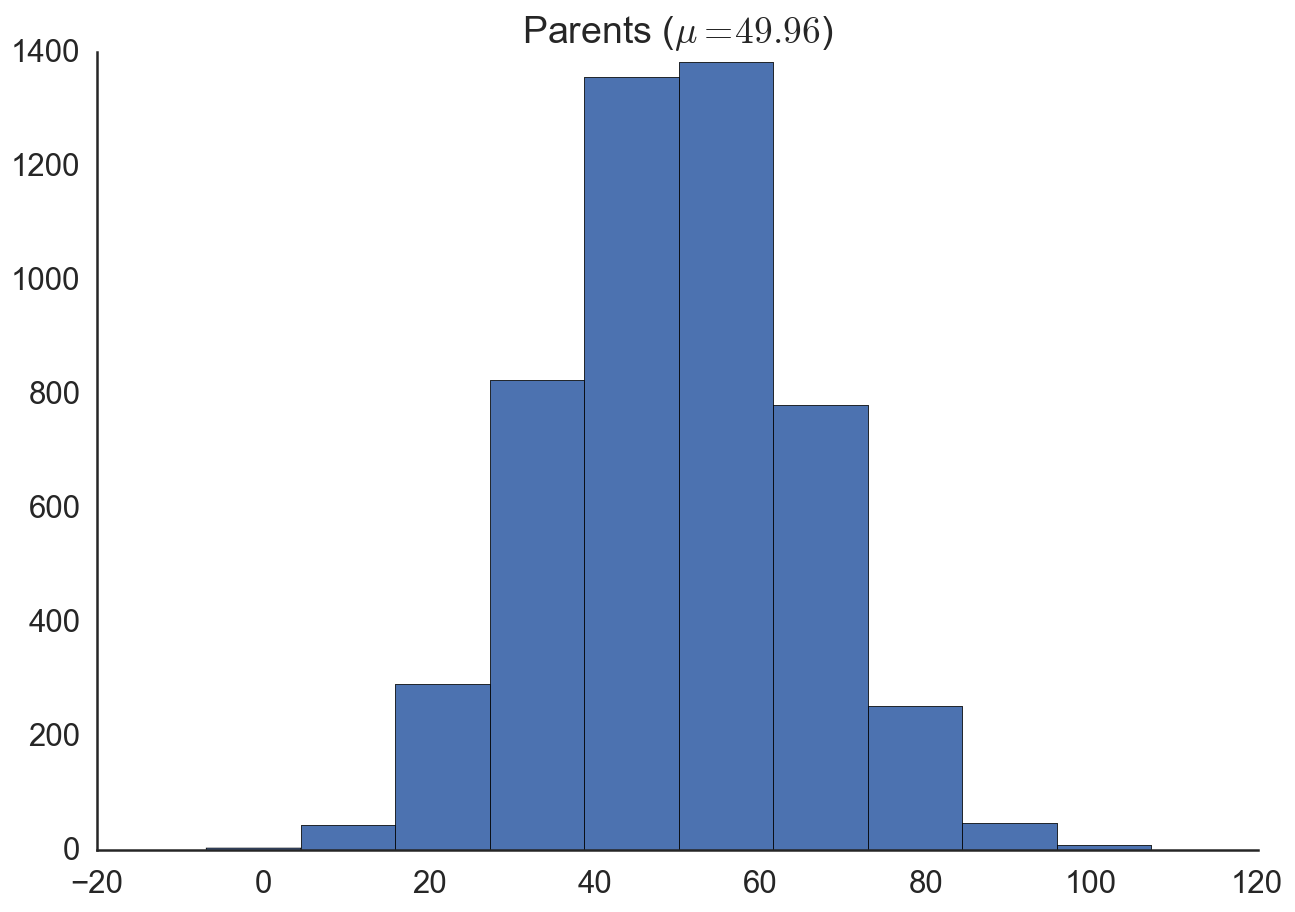

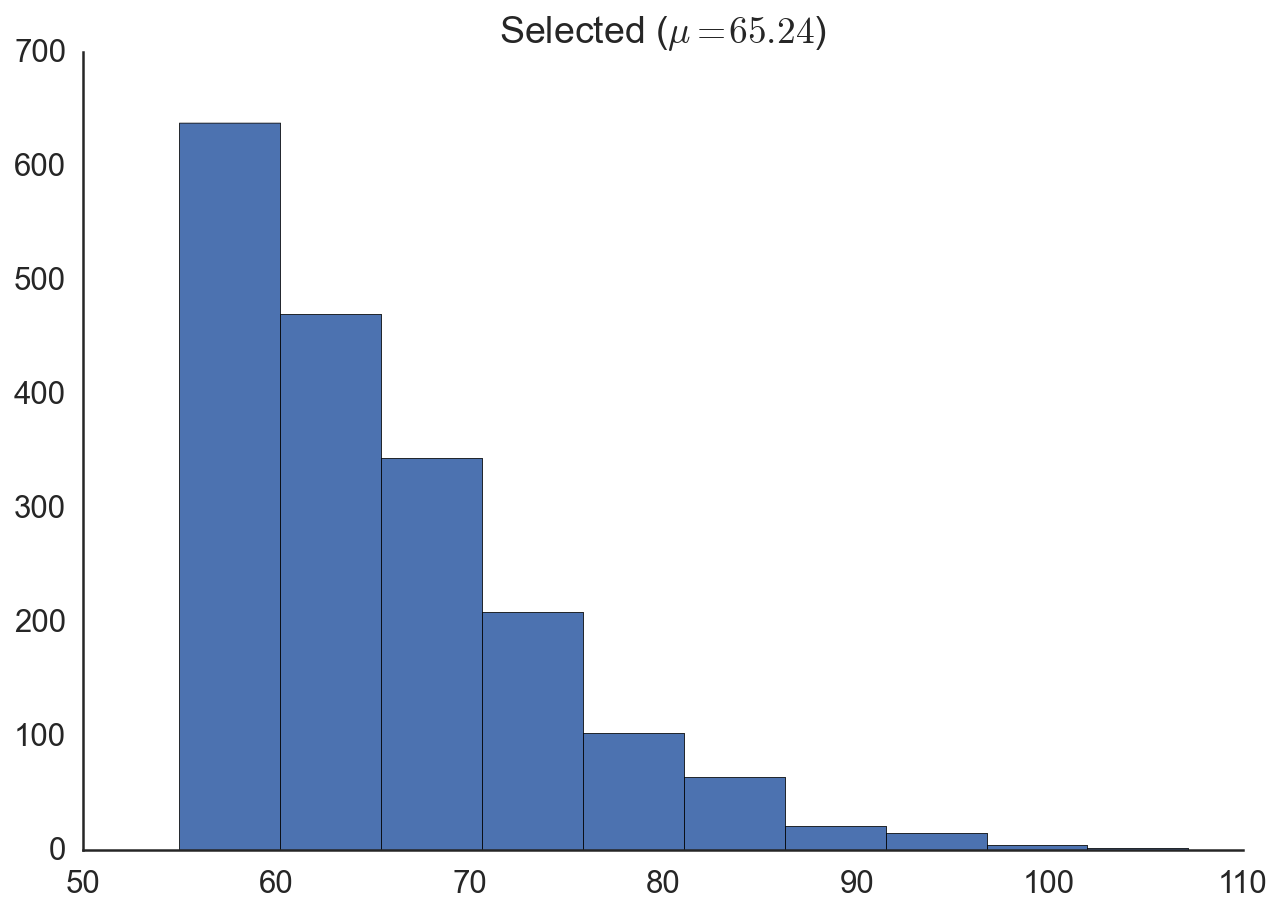

In [6]:
plot_hist(parent_heights, "Parents ($\mu=%.2f$)" % np.mean(parent_heights))
plot_hist(selected_parents, "Selected ($\mu=%.2f$)" % np.mean(selected_parents))

In [7]:
h2 = 0.7
offspring_heights = []

def offspring_height(x):
    d = sp.random.uniform(0, 0.25)
    if sp.random.random() < 0.5:
        return x - x*d
    else:
        return x + x*d

for p in selected_parents:
    r = sp.random.random()
    if r < h2:
        offspring_heights.append(offspring_height(p))
    else:
        offspring_heights.append(sp.random.normal(scale=scale, loc=loc))

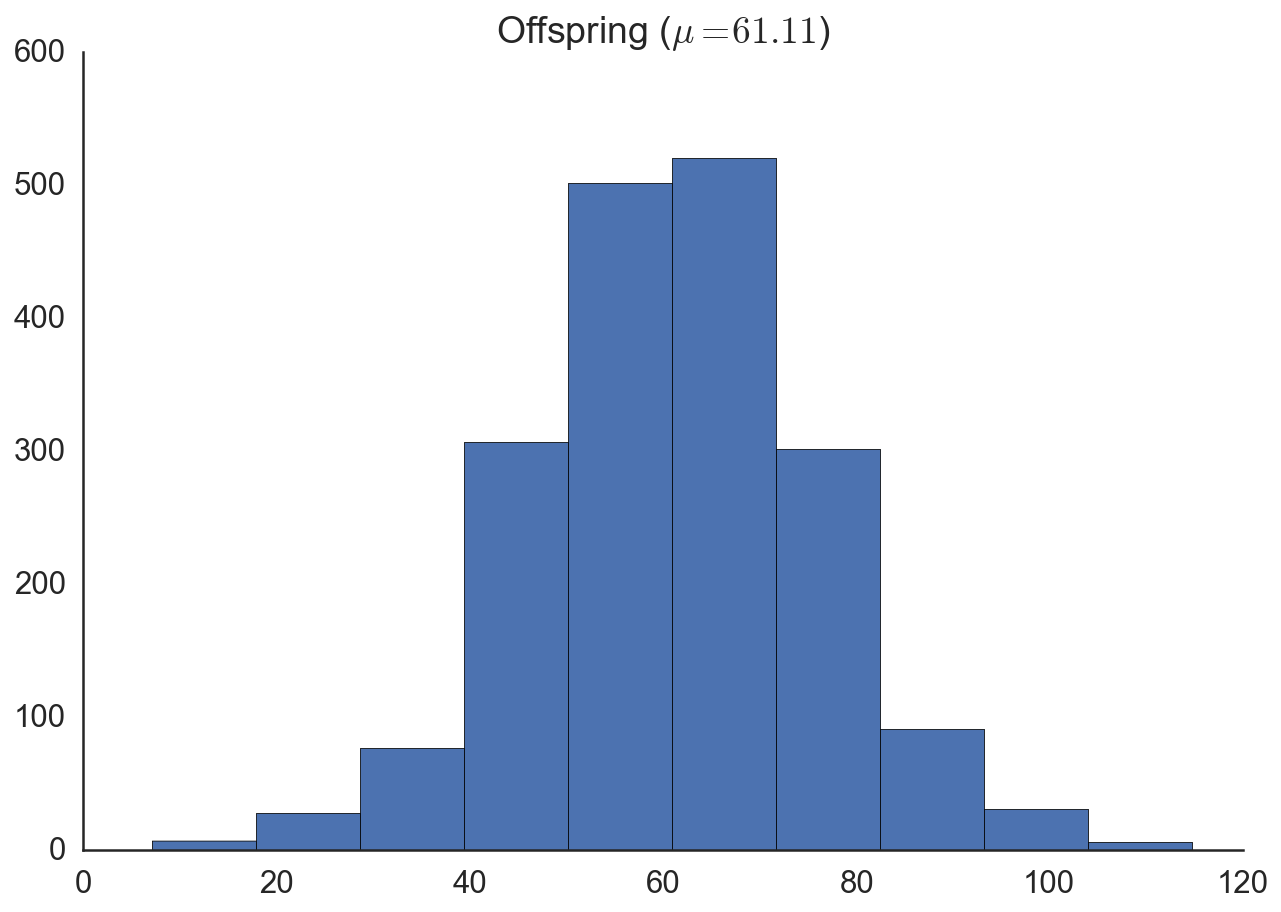

In [8]:
plot_hist(offspring_heights, "Offspring ($\mu=%.2f$)" % np.mean(offspring_heights))


In [9]:
reg = sp.stats.linregress(selected_parents, 
                          offspring_heights)
print reg
slope, intercept, r_value, p_value, std_err = reg

(0.68521587383632299, 16.411884793305788, 0.38773583980915416, 3.3174144491032247e-68, 0.037669814984227883)


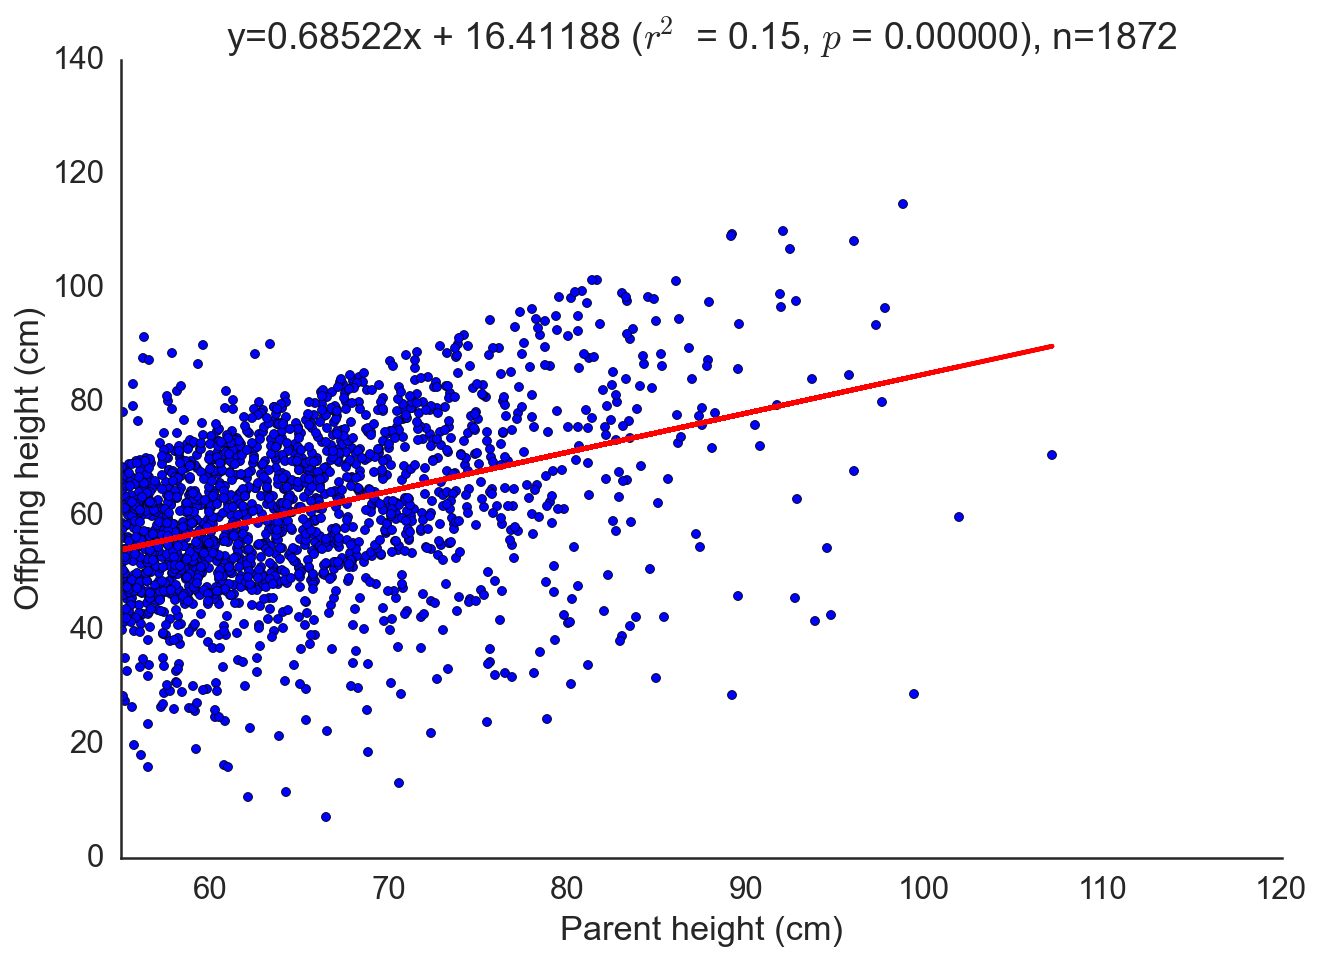

In [10]:
plt.scatter(selected_parents, offspring_heights)
plt.xlabel("Parent height (cm)")
plt.ylabel("Offpring height (cm)")
plt.title("y=%.5fx + %.5f ($r^2$ = %.2f, $p$ = %.5f), n=%d" % (slope, 
                                                         intercept, 
                                                         r_value**2,
                                                         p_value,
                                                         len(offspring_heights)))
plt.plot(parent_heights,parent_heights*slope+intercept, 'r-')
plt.xlim((55,120))
sns.despine()
plt.show()

##$R = h^2S$

In [11]:
S = np.mean(selected_parents)-np.mean(parent_heights)
S

15.280780333035842

In [12]:
R = slope*S
R

10.470633248802054

In [13]:
new_mean = np.mean(parent_heights) + R
new_mean

60.428085360067968